## Пишем простую нейронную сеть
### Подготовка данных

In [4]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Подготовить данные
data = torch.ones(100, 2)
x1 = torch.normal(mean=2*data, std=1)
y1 = torch.zeros(100)    # x1 соответствующий ярлык

x2 = torch.normal(mean=-2*data, std=1)
y2 = torch.ones(100)     # x2 соответствующий ярлык

train_x = torch.cat((x1, x2), dim=0).type(torch.float32)   # Объедините два типа данных (x1, x2) для генерации обучающих данных
label_y = torch.cat((y1, y2), dim=0).type(torch.int64)     # Объедините два типа заметок (y1, y2) для создания настоящих меток


# Визуализировать данные, сгенерированные matplotlib
# plt.scatter(train_x.numpy()[:, 0], train_x.numpy()[:, 1])
# plt.show()

In [6]:
# Построить нейронную сеть
class Neuro_net(torch.nn.Module):
    """Нейронные сети"""
    def __init__(self, n_feature, n_hidden_layer, n_output):
        super(Neuro_net, self).__init__()
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden_layer)
        self.output_layer = torch.nn.Linear(n_hidden_layer, n_output)

    def forward(self, input):
        hidden_out = torch.relu(self.hidden_layer(input))
        out = self.output_layer(hidden_out)
        return out

### Обучение

In [10]:
num_feature = 2
num_hidden_layer = 10
num_output = 2
epoches = 200
net = Neuro_net(num_feature, num_hidden_layer, num_output)
print(net)   # Просмотр сетевой структуры

# Оптимизатор
optimizer = torch.optim.SGD(net.parameters(), lr=0.002)
# Определить функцию потерь
loss_function = torch.nn.CrossEntropyLoss()

for epoch in range(epoches):
    out = net(train_x)
    loss = loss_function(out, label_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Neuro_net(
  (hidden_layer): Linear(in_features=2, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=2, bias=True)
)


### Визуализация

Обученных шагов: 0 | потеря: 1.0273427963256836.


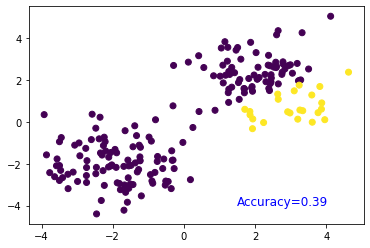

Обученных шагов: 5 | потеря: 0.9907679557800293.


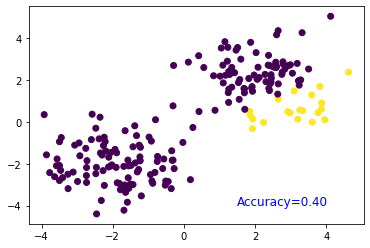

Обученных шагов: 10 | потеря: 0.9559237957000732.


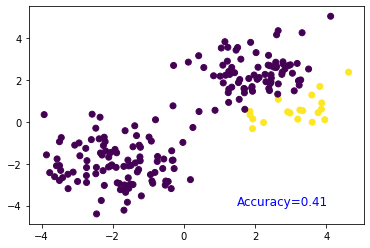

Обученных шагов: 15 | потеря: 0.9227349758148193.


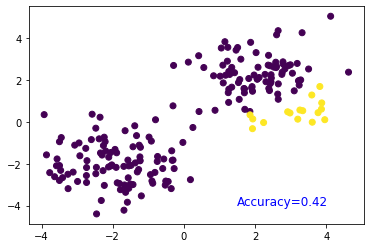

Обученных шагов: 20 | потеря: 0.8911274075508118.


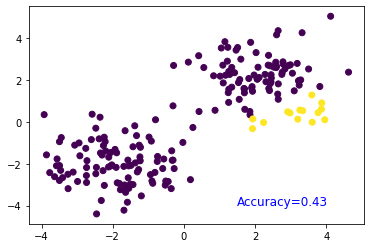

Обученных шагов: 25 | потеря: 0.8610240817070007.


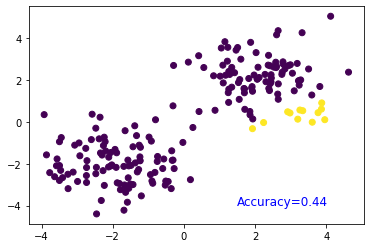

Обученных шагов: 30 | потеря: 0.8323484063148499.


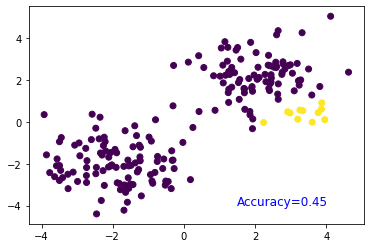

Обученных шагов: 35 | потеря: 0.8050522804260254.


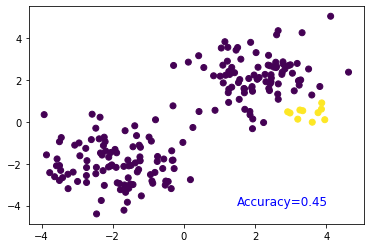

Обученных шагов: 40 | потеря: 0.779062032699585.


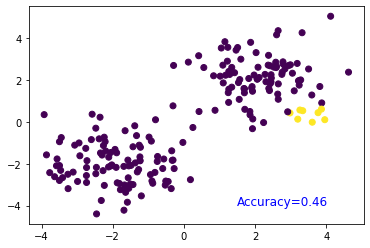

Обученных шагов: 45 | потеря: 0.7543109655380249.


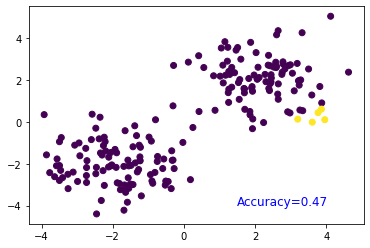

Обученных шагов: 50 | потеря: 0.7307361364364624.


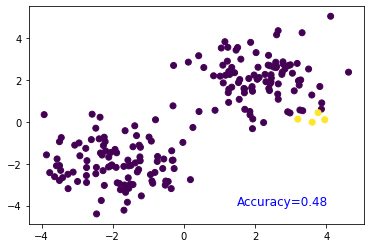

Обученных шагов: 55 | потеря: 0.7082675695419312.


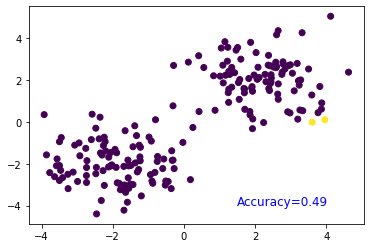

Обученных шагов: 60 | потеря: 0.686851978302002.


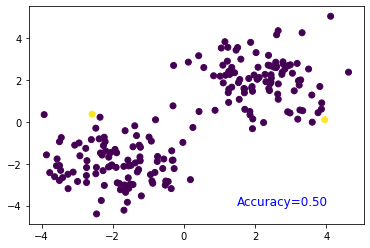

Обученных шагов: 65 | потеря: 0.6664308905601501.


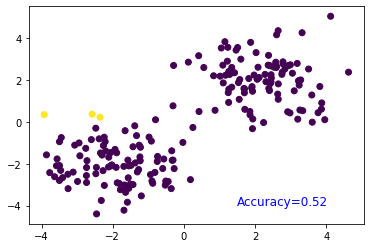

Обученных шагов: 70 | потеря: 0.6469612121582031.


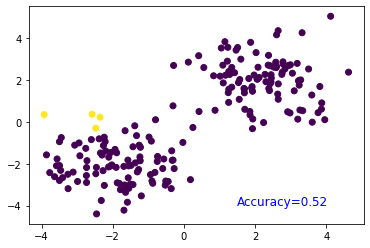

Обученных шагов: 75 | потеря: 0.6283931136131287.


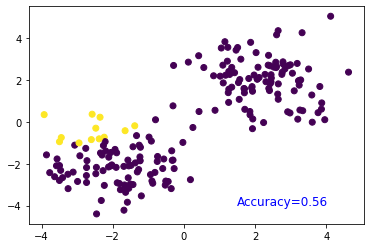

Обученных шагов: 80 | потеря: 0.6106807589530945.


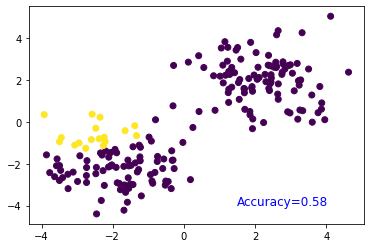

Обученных шагов: 85 | потеря: 0.5937720537185669.


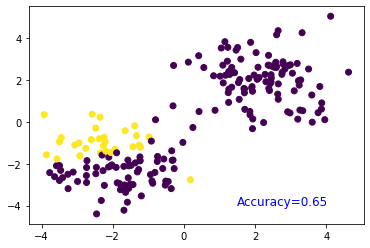

Обученных шагов: 90 | потеря: 0.577620267868042.


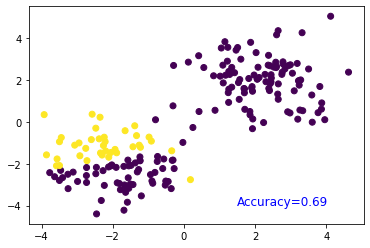

Обученных шагов: 95 | потеря: 0.5621812343597412.


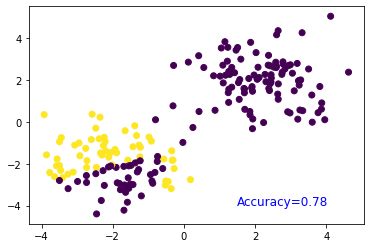

Обученных шагов: 100 | потеря: 0.5474171042442322.


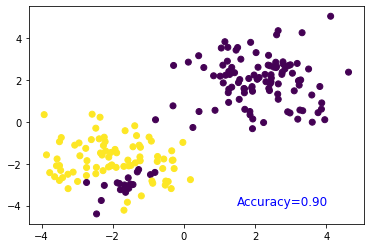

Обученных шагов: 105 | потеря: 0.5332911610603333.


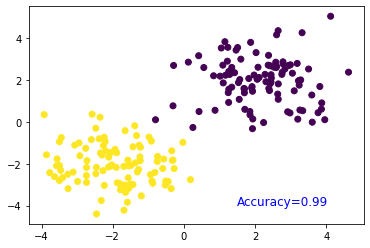

Обученных шагов: 110 | потеря: 0.5197679996490479.


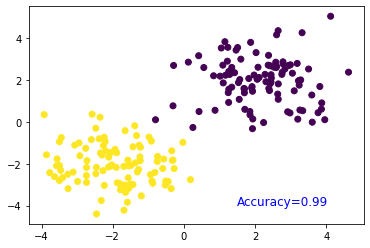

Обученных шагов: 115 | потеря: 0.5068116784095764.


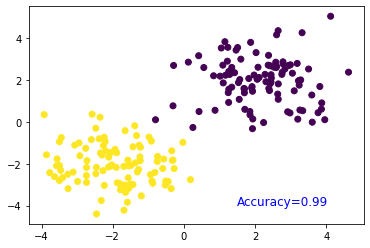

Обученных шагов: 120 | потеря: 0.4943971335887909.


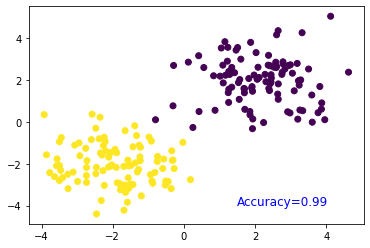

Обученных шагов: 125 | потеря: 0.48249027132987976.


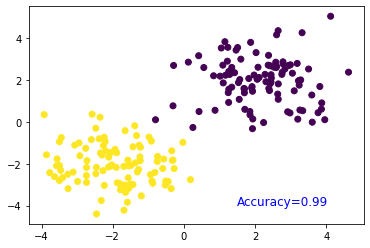

Обученных шагов: 130 | потеря: 0.4710625410079956.


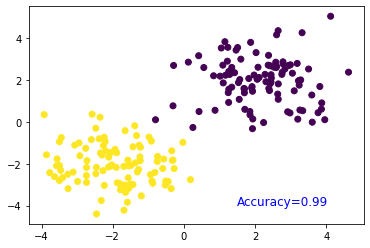

Обученных шагов: 135 | потеря: 0.46008843183517456.


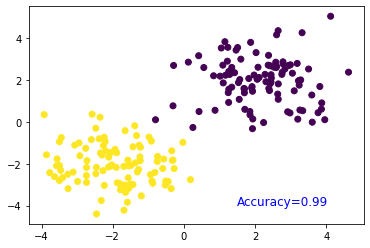

Обученных шагов: 140 | потеря: 0.44954437017440796.


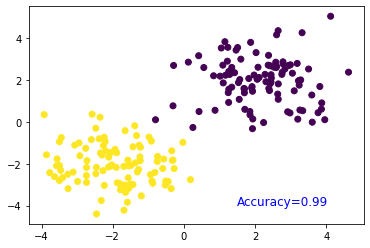

Обученных шагов: 145 | потеря: 0.43940961360931396.


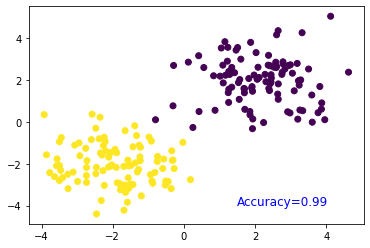

Обученных шагов: 150 | потеря: 0.42966437339782715.


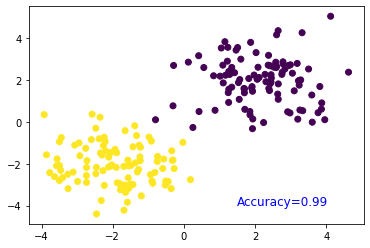

Обученных шагов: 155 | потеря: 0.4202853739261627.


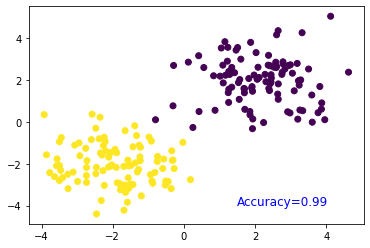

Обученных шагов: 160 | потеря: 0.41125229001045227.


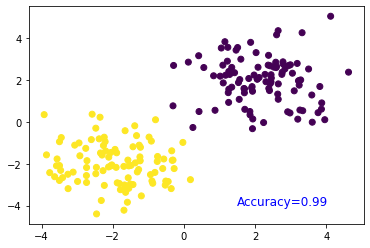

Обученных шагов: 165 | потеря: 0.4025481343269348.


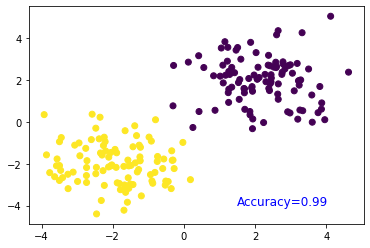

Обученных шагов: 170 | потеря: 0.39415889978408813.


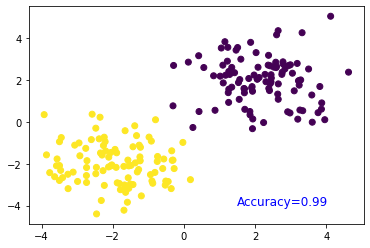

Обученных шагов: 175 | потеря: 0.3860669732093811.


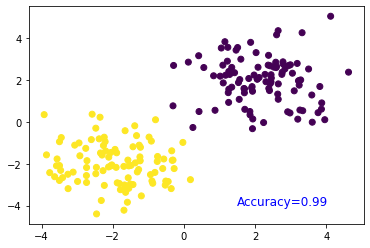

Обученных шагов: 180 | потеря: 0.3782620131969452.


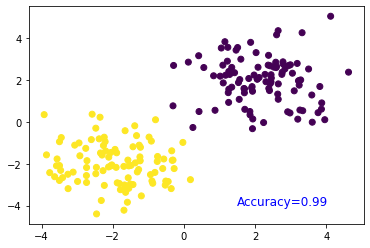

Обученных шагов: 185 | потеря: 0.3707248568534851.


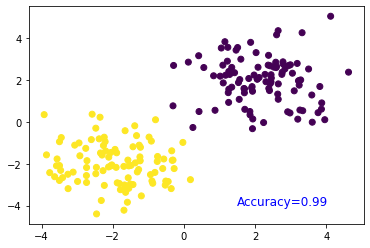

Обученных шагов: 190 | потеря: 0.3634437322616577.


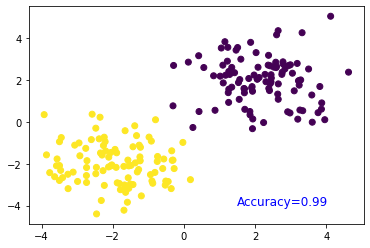

Обученных шагов: 195 | потеря: 0.3564091622829437.


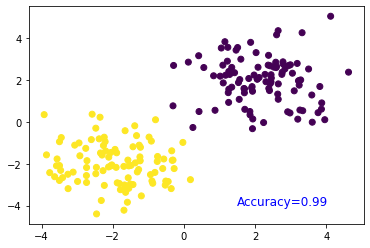

In [12]:
import matplotlib.pyplot as plt
plt.ion()   # Рисование

for epoch in range(epoches):
    out = net(train_x)
    loss = loss_function(out, label_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print("Обученных шагов: {} | потеря: {}.".format(epoch, loss))
        plt.cla()
        pridect_y = torch.max(out, dim=1)[1]
        pridect_label = pridect_y.data.numpy()  # Прогнозируемый ярлык
        true_label = label_y.data.numpy()       # Настоящая этикетка

        plt.scatter(train_x.data.numpy()[:, 0], train_x.data.numpy()[:, 1], c=pridect_label)
        # Рассчитать коэффициент точности, отобразить коэффициент точности
        accuracy = float((pridect_label == true_label).astype(int).sum()) / float(true_label.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 12, 'color': 'blue'})
        plt.pause(0.1)

plt.ioff()
plt.show()